In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('Iris.csv')
df=data.copy()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.shape

(150, 6)

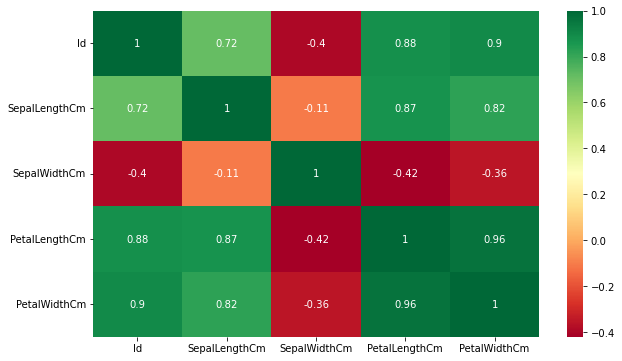

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

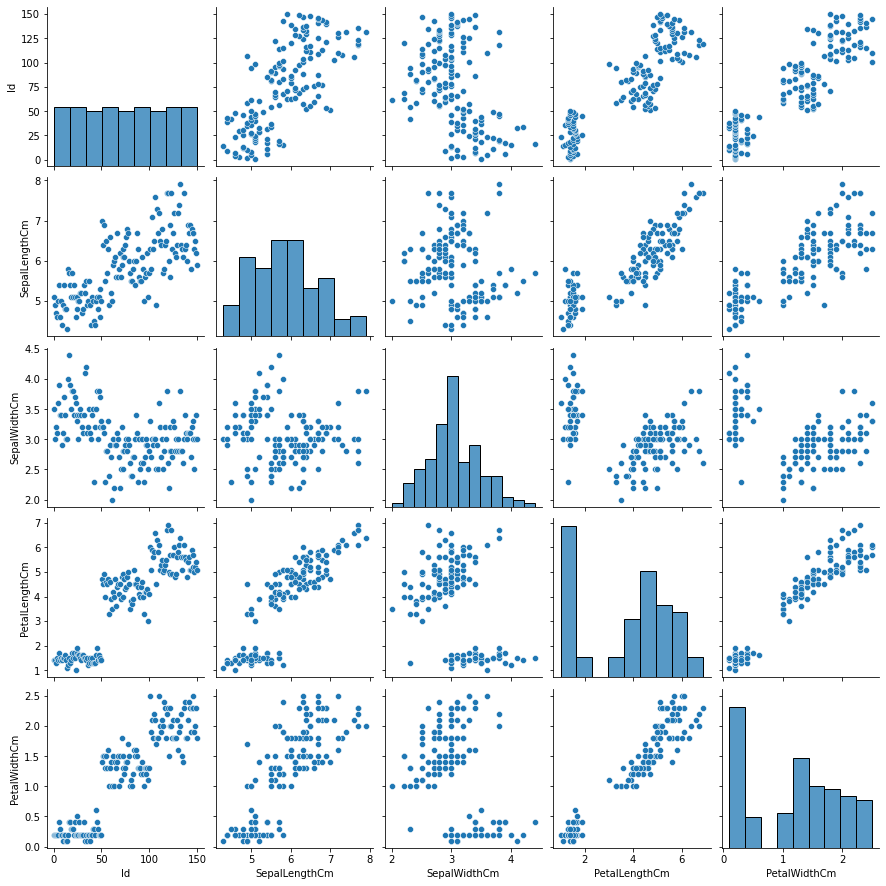

In [8]:
sns.pairplot(df)

In [9]:
num_df = df.drop('Species',axis=1)
num_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(num_df)
num_df = scaler.transform(num_df)

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(num_df)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
kmeans.cluster_centers_

array([[ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
       [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647]])

In [29]:
df['Clustered_Species']= y_kmeans.tolist()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clustered_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


In [30]:
print(len(df[df['Clustered_Species']==2]))
print(len(df[df['Species']=='Iris-versicolor']))

53
50


In [31]:
df['Clustered_Species'].replace({0:'C_Iris-virginica',1:'C_Iris-setosa',2:'C_Iris-versicolor'},inplace =True)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clustered_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,C_Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,C_Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,C_Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,C_Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,C_Iris-setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,C_Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,C_Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,C_Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,C_Iris-virginica


In [40]:
print('Species:')
print('Iris-virginica:',len(df[df['Species']=='Iris-virginica']))
print('Iris-setosa:',len(df[df['Species']=='Iris-setosa']))
print('Iris-versicolor:',len(df[df['Species']=='Iris-versicolor']))

print('Clustered_Species:')
print('C_Iris-virginica:',len(df[df['Clustered_Species']=='C_Iris-virginica']))
print('C_Iris-setosa:',len(df[df['Clustered_Species']=='C_Iris-setosa']))
print('C_Iris-versicolor',len(df[df['Clustered_Species']=='C_Iris-versicolor']))

Species:
Iris-virginica: 50
Iris-setosa: 50
Iris-versicolor: 50
Clustered_Species:
C_Iris-virginica: 47
C_Iris-setosa: 50
C_Iris-versicolor 53


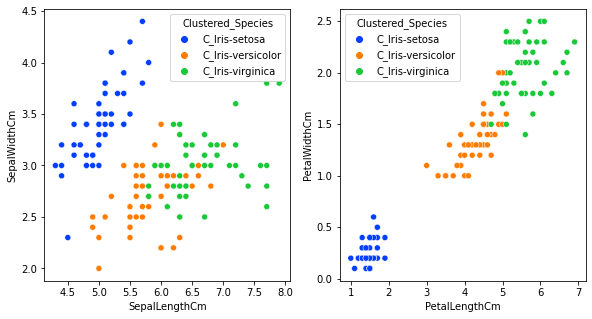

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data=df, hue = 'Clustered_Species', palette="bright")
plt.subplot(1,3,2)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data=df, hue = 'Clustered_Species', palette="bright")

plt.show()

# Hierarchical Clustering


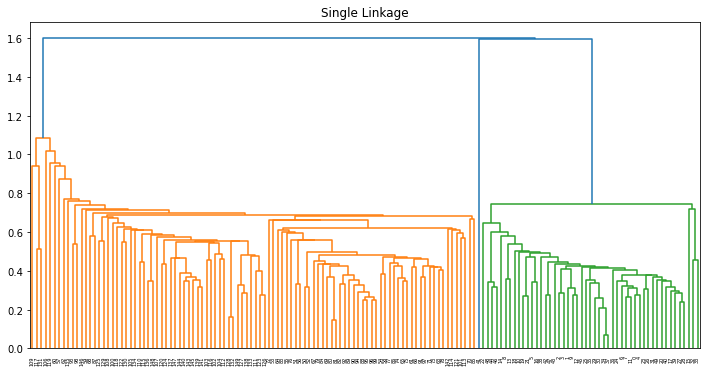

In [45]:
mergings = linkage(num_df, method="single", metric='euclidean')
plt.figure(figsize=(12,6))
dendrogram(mergings)
plt.title('Single Linkage')
plt.show()

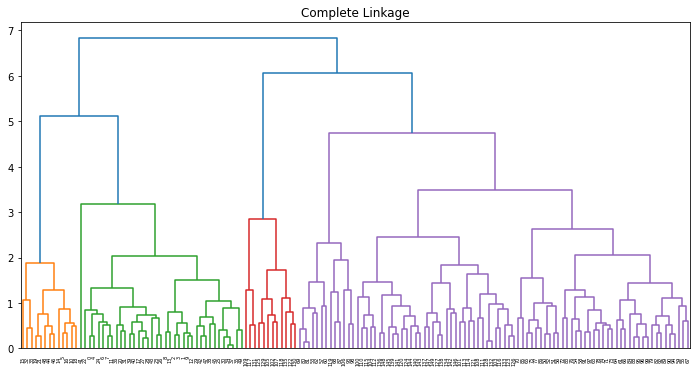

In [46]:
mergings = linkage(num_df, method="complete", metric='euclidean')
plt.figure(figsize=(12,6))
dendrogram(mergings)
plt.title('Complete Linkage')
plt.show()

In [47]:
HC=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_HC=HC.fit_predict(num_df)
y_HC

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [50]:
df['HC_Clustered_Species']= pd.Series(y_HC)
df[df['HC_Clustered_Species']==2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clustered_Species,HC_Clustered_Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica,C_Iris-virginica,2
101,102,5.8,2.7,5.1,1.9,Iris-virginica,C_Iris-versicolor,2
102,103,7.1,3.0,5.9,2.1,Iris-virginica,C_Iris-virginica,2
103,104,6.3,2.9,5.6,1.8,Iris-virginica,C_Iris-virginica,2
104,105,6.5,3.0,5.8,2.2,Iris-virginica,C_Iris-virginica,2
105,106,7.6,3.0,6.6,2.1,Iris-virginica,C_Iris-virginica,2
107,108,7.3,2.9,6.3,1.8,Iris-virginica,C_Iris-virginica,2
108,109,6.7,2.5,5.8,1.8,Iris-virginica,C_Iris-virginica,2
109,110,7.2,3.6,6.1,2.5,Iris-virginica,C_Iris-virginica,2
110,111,6.5,3.2,5.1,2.0,Iris-virginica,C_Iris-virginica,2


In [53]:
df['HC_Clustered_Species'].replace({0:'C_Iris-versicolor',1:'C_Iris-setosa',2:'C_Iris-virginica'},inplace =True)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clustered_Species,HC_Clustered_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,C_Iris-setosa,C_Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,C_Iris-setosa,C_Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,C_Iris-setosa,C_Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,C_Iris-setosa,C_Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,C_Iris-setosa,C_Iris-setosa
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,C_Iris-virginica,C_Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,C_Iris-virginica,C_Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica,C_Iris-virginica,C_Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,C_Iris-virginica,C_Iris-virginica


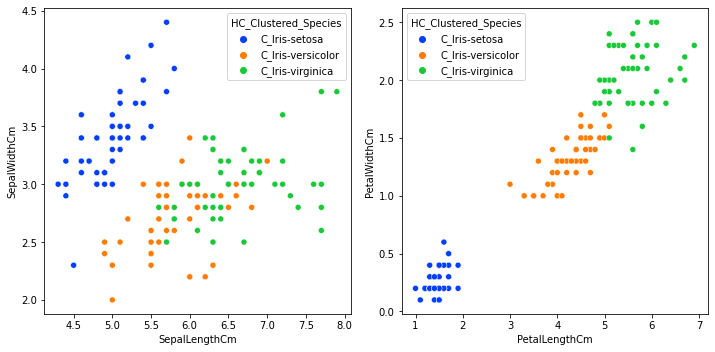

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data=df, hue = 'HC_Clustered_Species', palette="bright" )

plt.subplot(1,3,2)
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data=df, hue = 'HC_Clustered_Species', palette="bright" )

plt.tight_layout()
plt.show()

In [57]:
print('HC_Clustered_Species:')
print('C_Iris-virginica:',len(df[df['HC_Clustered_Species']=='C_Iris-virginica']))
print('C_Iris-setosa:',len(df[df['HC_Clustered_Species']=='C_Iris-setosa']))
print('C_Iris-versicolor:',len(df[df['HC_Clustered_Species']=='C_Iris-versicolor']))

print('Clustered_Species:')
print('C_Iris-virginica:',len(df[df['Clustered_Species']=='C_Iris-virginica']))
print('C_Iris-setosa:',len(df[df['Clustered_Species']=='C_Iris-setosa']))
print('C_Iris-versicolor',len(df[df['Clustered_Species']=='C_Iris-versicolor']))

HC_Clustered_Species:
C_Iris-virginica: 48
C_Iris-setosa: 50
C_Iris-versicolor: 52
Clustered_Species:
C_Iris-virginica: 47
C_Iris-setosa: 50
C_Iris-versicolor 53
